In [1]:
import h5py
import numpy as np

In [2]:
dataset_path = '../Datas/ucihar_data.txt'
data = np.loadtxt(dataset_path)

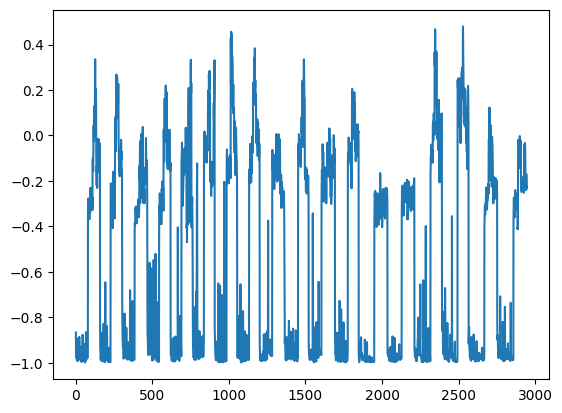

In [10]:
import matplotlib.pyplot as plt
plt.plot(data[:,200])

# Separate different activities, save original datasets

In [3]:
import h5py
from sklearn.preprocessing import StandardScaler

uschad_data_path = './Datas/uschad_dataset.h5'
uschad_activity_path = './Datas/uschad_activity_dataset.h5'

activity_name_dict = {
    1: "walkingforward",
    2: "walkingleft",
    3: "walkingright",
    4: "walkingupstairs",
    5: "walkingdownstairs",
    6: "runningforward",
    7: "jumping",
    8: "sitting",
    9: "standing",
    10: "sleeping",
    11: "elevatorup",
    12: "elevatordown"
}

def sliding_window(dataset, window_size, step_size):
    data_len = dataset.shape[0]
    num_windows = (data_len - window_size) // step_size + 1
    windows = []
    for i in range(num_windows):
        start_idx = i * step_size
        windows.append(dataset[start_idx : start_idx + window_size, :])
    return np.array(windows)

activity_data_dict = {}
scaler = StandardScaler()
with h5py.File(uschad_data_path, 'r') as f_r:
    data_grp = f_r['datas']
    for key in data_grp:
        
        key_data = data_grp[key][:]
        
        activity_i = key.split('_')[1].split('a')[1]
        activity_name = activity_name_dict[int(activity_i)]
        if activity_name not in activity_data_dict:
            activity_data_dict[activity_name] = []
        
        # slide_key_data = sliding_window(key_data, 128, 12)
        # activity_data_dict[activity_name].append(slide_key_data)
        key_data = scaler.fit_transform(key_data)
        activity_data_dict[activity_name].append(key_data)
        
with h5py.File(uschad_activity_path, 'w') as f_w:
    data_grp = f_w.create_group(name='datas')
    
    for key in activity_data_dict:
        aggregated_data = np.concatenate(activity_data_dict[key])
        
        data_grp.create_dataset(name=key, data=aggregated_data)
        
        print('check shape', key, aggregated_data.shape[0])
        

            
        
        
        
    

check shape sleeping 375000
check shape elevatorup 165491
check shape elevatordown 164999
check shape walkingforward 381400
check shape walkingleft 258800
check shape walkingright 275500
check shape walkingupstairs 211800
check shape walkingdownstairs 197400
check shape runningforward 176500
check shape jumping 107100
check shape sitting 261500
check shape standing 236000


In [12]:
for key in activity_data_dict:
    aggregated_data = np.concatenate(activity_data_dict[key])
    print('check shape', key, aggregated_data.shape)

check shape sleeping (375000, 6)
check shape elevator up (165491, 6)
check shape elevator down (164999, 6)
check shape walkingforward (381400, 6)
check shape walkingleft (258800, 6)
check shape walkingright (275500, 6)
check shape walkingupstairs (211800, 6)
check shape walkingdownstairs (197400, 6)
check shape runningforward (176500, 6)
check shape jumping (107100, 6)
check shape sitting (261500, 6)
check shape standing (236000, 6)


In [2]:
import os, re


def find_recent_pth(folder_path):
    # List all files in the directory
    files = os.listdir(folder_path)
    
    # Filter out .pt files
    pt_files = [f for f in files if f.endswith('.pt')]
    
    # If no .pt files found, return None
    if not pt_files:
        return None

    # Extract the episode number from the filename using regular expressions
    def extract_episode_number(filename):
        match = re.search(r'ep(\d+)', filename)
        if match:
            return int(match.group(1))
        return -1
    
    # Sort the files by the extracted episode number
    pt_files.sort(key=extract_episode_number, reverse=True)

    # Return the latest .pt file (the first one after sorting)
    return pt_files[0]

folder_path = './Experiments/jumping/'
file_path = find_recent_pth(folder_path)
print(file_path)

jumping_ep49.pt


In [3]:
file_part = file_path.split('.')[0].split('ep')[1]
print(file_part)

49


In [11]:
import h5py

metrix_path = '/mnt/data728/datasets/USC-HAD-maodong/uschad_metrix_generate.h5'
with h5py.File(metrix_path, 'r') as f_r:
    data_grp = f_r['train_datas']
    dataset = data_grp['0']
    print(dataset.shape)
    print(dataset.attrs['activity'])


(200, 6)
9


In [14]:
dataset_path = './Datas/uschad_activity_dataset.h5'
with h5py.File(dataset_path, 'r') as f_r:
    data_grp = f_r['datas']
    jumping_dataset = data_grp['jumping']
    print(jumping_dataset.shape)

(107100, 6)


In [1]:
activity_name_dict = {
    1: "walkingforward",
    2: "walkingleft",
    3: "walkingright",
    4: "walkingupstairs",
    5: "walkingdownstairs",
    6: "runningforward",
    7: "jumping",
    8: "sitting",
    9: "standing",
    10: "sleeping",
    11: "elevatorup",
    12: "elevatordown"
}

activity_label = {
    'walkingforward': 1,
    'walkingleft': 2,
    'walkingright': 3,
    'walkingupstairs': 4,
    'walkingdownstairs': 5,
    'runningforward': 6,
    'jumping': 7,
    'sitting': 8,
    'standing': 9,
    'sleeping': 10,
    'elevatorup': 11,
    'elevatordown': 12
}


In [2]:
import numpy as np
import h5py
from sklearn.preprocessing import MinMaxScaler

dataset_path = '../Datas/uschad_activity_dataset.h5'
output_path = '../Datas/genbylabel_dataset_200.h5'

window = 200  # Size of each split window

def normalize_to_neg_one_to_one(x):
    return x * 2 - 1

# Create a new HDF5 file to store splitted datasets
with h5py.File(dataset_path, 'r') as f_r, h5py.File(output_path, 'w') as f_w:
    datagrp = f_r['datas']
    label_all = []
    data_all = []
    
    for activity_name, dataset in datagrp.items():
        data = dataset[:]
        scaler = MinMaxScaler()
        data_fitted = scaler.fit_transform(data)
        data_fitted = normalize_to_neg_one_to_one(data_fitted)
        
        num_splits = max((data.shape[0] - window + 1) // window, 0)
        
        for i in range(num_splits):
            start = i * window
            end = (i + 1) * window
            data_all.append(data_fitted[start:end, :])
            label_all.append(activity_label[activity_name]-1)
        
    f_w.create_dataset(name='datas', data=np.array(data_all))
    f_w.create_dataset(name='labels', data=np.array(label_all, dtype='int'))
    

In [3]:
import numpy as np
import h5py

dataset_path = '../Datas/uschad_activity_dataset.h5'
output_path = '../Datas/genbylabel_dataset_200.h5'

# window = 100  # Size of each split window

# Create a new HDF5 file to store splitted datasets
with h5py.File(output_path, 'r') as f_r, h5py.File(dataset_path, 'a') as f_w:

    data_all = f_r['datas'][:]
    label_all = f_r['labels'][:]
    
    if 'data_genbylabel_200' in f_w:
        del f_w['data_genbylabel_200']
    if 'label_genbylabel_200' in f_w:
        del f_w['label_genbylabel_200']
    
    f_w.create_dataset(name='data_genbylabel_200', data=data_all)
    f_w.create_dataset(name='label_genbylabel_200', data=label_all)
    

In [10]:
import h5py
dataset_path = '../Datas/uschad_activity_dataset.h5'
with h5py.File(dataset_path, 'r') as f_r:
    datagrp = f_r['datas']
    jumping  = datagrp['jumping']
    length = (jumping.shape[0] - 100+1) // 100
    
    label_genbylabel = f_r['label_genbylabel'][:]
    jumping_count = np.sum(label_genbylabel == 6)
    
    print(jumping.shape, length, jumping_count)

(107100, 6) 1070 1070


In [15]:
(164999 - 23)  // 24

6874

In [8]:
import numpy as np

activity = 'sitting'

jumping_ground_path = f'../Experiments_new/{activity}/{activity}_ground_truth_24_train.npy'
jumping_norm_path = f'../Experiments_new/{activity}/{activity}_norm_truth_24_train.npy'

ground = np.load(jumping_ground_path)
norm = np.load(jumping_norm_path)


In [9]:
ground.shape, norm.shape

((10894, 24, 6), (10894, 24, 6))

In [10]:
print(ground[100,:,0])
print(norm[100,:,0])


[-1.91518526 -1.91518526 -2.14957103 -2.14957103 -1.91518526 -1.44640966
 -1.68079543 -2.14957103 -1.68079543 -2.38396087 -2.61834664 -2.61834664
 -2.38396087 -2.14957103 -1.91518526 -1.91518526 -1.91518526 -2.14957103
 -2.14957103 -2.14957103 -1.91518526 -1.91518526 -1.68079543 -1.91518526]
[0.39318559 0.39318559 0.38322564 0.38322564 0.39318559 0.41310568
 0.40314572 0.38322564 0.40314572 0.37326551 0.36330555 0.36330555
 0.37326551 0.38322564 0.39318559 0.39318559 0.39318559 0.38322564
 0.38322564 0.38322564 0.39318559 0.39318559 0.40314572 0.39318559]


In [8]:
import h5py
import pandas as pd

# Define activity descriptions
activity_descriptions = {
    "walkingforward": "The subject walks forward in a straight line",
    "walkingleft": "The subject walks counter-clockwise in a full circle",
    "walkingright": "The subject walks clockwise in a full circle",
    "walkingupstairs": "The subject goes up multiple flights",
    "walkingdownstairs": "The subject goes down multiple flights",
    "runningforward": "The subject runs forward in a straight line",
    "jumping": "The subject stays at the same position and continuously jumps up and down",
    "sitting": "The subject sits on a chair either working or resting. Fidgeting is also considered to belong to this class.",
    "standing": "The subject stands and talks to someone",
    "sleeping": "The subject sleeps or lies down on a bed",
    "elevatorup": "The subject rides in an ascending elevator",
    "elevatordown": "The subject rides in a descending elevator"
}

# Initialize lists to store keys, shapes, and descriptions
keys, shapes, descriptions = [], [], []

# Define the path to the dataset
dataset_path = '../Datas/uschad_activity_dataset.h5'

# Open the HDF5 file and extract the data
with h5py.File(dataset_path, 'r') as f_r:
    data_grp = f_r['datas']
    for key in data_grp:
        dataset = data_grp[key]
        keys.append(key)
        shapes.append(dataset.shape)
        descriptions.append(activity_descriptions.get(key, "No description available"))

# Create a DataFrame with the collected information
df = pd.DataFrame({
    'Activity': keys,
    'Shape': shapes,
    'Description': descriptions
})

# Display the DataFrame
df

,Activity,Shape,Description
0,elevatordown,"(164999, 6)",The subject rides in a descending elevator
1,elevatorup,"(165491, 6)",The subject rides in an ascending elevator
2,jumping,"(107100, 6)",The subject stays at the same position and con...
3,runningforward,"(176500, 6)",The subject runs forward in a straight line
4,sitting,"(261500, 6)",The subject sits on a chair either working or ...
5,sleeping,"(375000, 6)",The subject sleeps or lies down on a bed
6,standing,"(236000, 6)",The subject stands and talks to someone
7,walkingdownstairs,"(197400, 6)",The subject goes down multiple flights
8,walkingforward,"(381400, 6)",The subject walks forward in a straight line
9,walkingleft,"(258800, 6)",The subject walks counter-clockwise in a full ...
